In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy
from sklearn.linear_model import ElasticNet
import gc

In [2]:
data_all = scanpy.read_h5ad("/home/henry/Downloads/tabula-muris-senis-bbknn-processed-official-annotations.h5ad")


/home/henry/.local/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/henry/.local/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [9]:
del data_all
gc.collect()

1470

In [3]:
ages_all = data_all.obs['age'].str[:-1].astype(int).values


In [4]:
gene_names_all = data_all.var.index.values


In [5]:
data_s = data_all.X

In [9]:
data_s = np.asarray((data_all.X[np.random.choice(np.arange(data_all.X.shape[0]),10000)]).todense())

In [13]:
data_s = data_all.astype("float16")

AttributeError: 'AnnData' object has no attribute 'astype'

In [6]:
del data_all
gc.collect()

287

In [14]:
model_all = LinearRegression(n_jobs=-1).fit(data_all, ages_all)

In [7]:
model_a = ElasticNet(alpha=0.25).fit(data_s, ages_all)

In [20]:
z = sorted(zip(model_a.coef_, gene_names_all), reverse=True)

In [21]:
df = pd.DataFrame({"Gene Name": [v[1] for v in z], "Coef Value": [g[0] for g in z]})
df.to_csv(index=False, path_or_buf="all_data_elasticnet.csv")

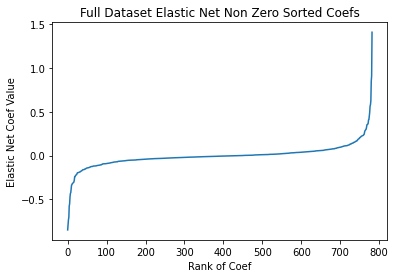

[-5.51365733e-01 -2.29627907e-01 -2.19003975e-01 -1.69372812e-01
 -1.31017298e-01 -1.18285365e-01 -4.46963571e-02 -4.42796759e-02
 -4.33067605e-02 -3.40209194e-02 -1.43224793e-02 -7.55315926e-03
 -3.70813161e-03 -3.62568023e-03 -1.16247556e-03 -1.11573737e-03
 -1.04912918e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000

In [22]:
plt.figure()
toplot = model_a.coef_[np.argsort(model_a.coef_)]
toplot = toplot[np.argwhere(toplot)]
plt.plot(toplot)
plt.xlabel("Rank of Coef")
plt.ylabel("Elastic Net Coef Value")
plt.title("Full Dataset Elastic Net Non Zero Sorted Coefs")
plt.show()
print(model_a.coef_[np.argsort(model_a.coef_)[np.abs(model_a.coef_) > 1e-5]])

In [14]:
cov_model = GraphicalLassoCV(n_jobs=-1, verbose=True).fit(data_all)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
